In [1]:
# EE559 HW03 - Mathematical Pattern Recognition

# Author: Creed Reilly

# USC ID: 6721694310

# Date: 6/17/2021

In [2]:
# Package Initialization
import numpy as np
import pandas as pd
import statistics as stat
import sklearn.metrics as met
import matplotlib.pyplot as plt
import imblearn.over_sampling as samp
import sklearn.neighbors as neighbors

In [3]:
# Part A - Download the data

# Data located in r'../data/wpbc.data'

In [4]:
# Part B - Creating the Training Set
cols = ['Income','Outcome','ID',
        'Rad.1','Tex.1','Peri.1','Area.1','Smooth.1','Compact.1','Concavity.1','CP.1','Symm.1','FD.1',
        'Rad.2','Tex.2','Peri.2','Area.2','Smooth.2','Compact.2','Concavity.2','CP.2','Symm.2','FD.2',
        'Rad.3','Tex.3','Peri.3','Area.3','Smooth.3','Compact.3','Concavity.3','CP.3','Symm.3','FD.3',
        'TumorSize','LymphNodes']; # write out column names
WPBC = pd.read_csv(r'../data/wpbc.data',names = cols); # read in the WPBC data frame

print('XXX.1 : Mean of XXX')
print('XXX.2 : Std. Dev. of XXX')
print('XXX.3 : Mean_Top3 of XXX')

XXX.1 : Mean of XXX
XXX.2 : Std. Dev. of XXX
XXX.3 : Mean_Top3 of XXX


In [5]:
# Change N/R to 0/1
WPBC.replace('N',0,inplace=True); # change the non-recurrent values to false (0)
WPBC.replace('R',1,inplace=True); # change the recurrent values to true (1)


In [6]:
# Remove redundant features

WPBC.drop('Compact.1',axis='columns',inplace=True) # Removes Compactness mean
WPBC.drop('Compact.2',axis='columns',inplace=True) # Removes Compactness std. dev.
WPBC.drop('Compact.3',axis='columns',inplace=True) # Removes Compactness mean3
WPBC.drop('ID', axis='columns',inplace=True) # Removes patient ID; has no effect on recurrence

In [7]:
WPBC

,Income,Outcome,Rad.1,Tex.1,Peri.1,Area.1,Smooth.1,Concavity.1,CP.1,Symm.1,...,Tex.3,Peri.3,Area.3,Smooth.3,Concavity.3,CP.3,Symm.3,FD.3,TumorSize,LymphNodes
0,119513,0,18.02,27.60,117.50,1013.0,0.09489,0.10860,0.07055,0.1865,...,37.08,139.70,1436.0,0.11950,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,0,17.99,10.38,122.80,1001.0,0.11840,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,0,21.37,17.44,137.50,1373.0,0.08836,0.12550,0.08180,0.2333,...,20.98,159.10,1949.0,0.11880,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,0,11.42,20.38,77.58,386.1,0.14250,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,1,20.29,14.34,135.10,1297.0,0.10030,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,0,22.52,21.92,146.90,1597.0,0.07592,0.06862,0.06367,0.1728,...,24.81,162.10,1902.0,0.08191,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,0,15.44,31.18,101.00,740.4,0.09399,0.13750,0.06500,0.1735,...,41.48,112.60,929.0,0.12720,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,0,17.17,29.19,110.00,915.3,0.08952,0.06583,0.05068,0.1793,...,36.66,132.50,1295.0,0.12610,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,1,21.42,22.84,145.00,1440.0,0.10700,0.23800,0.13180,0.1884,...,27.98,198.30,2375.0,0.14980,0.5411,0.22150,0.2832,0.08981,3.0,?


In [8]:
# Create training set with rows 1-130, 197

NRSet = WPBC.loc[WPBC['Outcome'] == 0].reset_index()
RSet = WPBC.loc[WPBC['Outcome'] == 1].reset_index()
trainingSet = pd.DataFrame();
trainingSet = trainingSet.append(NRSet.loc[0:129,:], ignore_index = True); # Add the 1st 130 non-recurrent cases to training set
trainingSet = trainingSet.append(RSet.loc[0:36,:], ignore_index = True) # Add the 1st 37 recurrent cases to training set
trainingSet = trainingSet.append(WPBC.loc[197,:],ignore_index = True); # Add row 197
trainingSet.drop('index',axis='columns',inplace=True) # Removes index created training set creation

# Create test set with remaining rows
testSet = pd.DataFrame();
testSet = testSet.append(NRSet.loc[130:195,:], ignore_index = True)
testSet = testSet.append(RSet.loc[37:,:], ignore_index = True)
testSet.drop('index',axis='columns',inplace=True) # Removes index created training set creation


In [9]:
# Part C - Replace '?' with median Lymph Node size

trainingSet.replace('?',-1,inplace = True); # replace ?'s with absurd value that cannot be true
med = trainingSet.median(axis=0)
trainingSet.replace(-1,med['LymphNodes'],inplace = True); # replace absurd value with median value
trainingSet['LymphNodes'] = pd.to_numeric(trainingSet['LymphNodes']) # change col from str to numerical

testSet.replace('?',-1,inplace = True); # replace ?'s with absurd value that cannot be true
med = testSet.median(axis=0)
testSet.replace(-1,med['LymphNodes'],inplace = True); # replace absurd value with median value
testSet['LymphNodes'] = pd.to_numeric(testSet['LymphNodes']) # change col from str to numerical


In [10]:
# Part D - Naive Bayes' Classification

def NaiveBayes(X_train,y_train,X_test,y_test): 
    # Description
    # y_train, y_test must be binary classes, set up as 0 or 1
    # X_train, X_test must be same length as corresponding y's
    # Need to filter out redundant features prior
    import numpy as np
    import pandas as pd
    
    # Step 1 : create mxs for each class to get means, std.
    
    # Class 0
    len_y = np.arange(y_train.shape[0]);
    c0_train = np.zeros([1,X_train.shape[1]]);
    c1_train = np.zeros([1,X_train.shape[1]]);

    for i in len_y:
        if y_train[i] == 0:
            c0_train = np.vstack([c0_train,X_train[i,:]])
        else:
            c1_train = np.vstack([c1_train,X_train[i,:]])
    
    c0_train = np.delete(c0_train,0,0) # remove the first line to initialize the mx; not needed
    c1_train = np.delete(c1_train,0,0) # remove the first line to initialize the mx; not needed
    
    # Class 1
    len_y = np.arange(y_test.shape[0]);
    c0_test = np.zeros([1,X_test.shape[1]]);
    c1_test = np.zeros([1,X_test.shape[1]]);

    for i in len_y:
        if y_test[i] == 0:
            c0_test = np.vstack([c0_test,X_test[i,:]])
        else:
            c1_test = np.vstack([c1_test,X_test[i,:]])
    
    c0_test = np.delete(c0_test,0,0)
    c1_test = np.delete(c1_test,0,0)
  
    # Step 2 : Create a priori probabilities
    
    aprob1 = sum(y_train)/y_train.shape[0]; # sum up
    aprob0 = 1 - aprob1;
    
    # Step 3 : Calculate mean and standard deviation for each conditional class - training set only!
    
    p0_train = np.zeros([c0_train.shape[1],2]); # [mean, std]
    p1_train = np.zeros([c1_train.shape[1],2]); # [mean, std]

    
    counter = np.arange(c0_train.shape[1])
    for i in counter:
        p0_train[i,0] = c0_train[:,i].mean();
        p0_train[i,1] = c0_train[:,i].std()*np.sqrt(c0_train.shape[0]/(c0_train.shape[0]-1));
        
    counter = np.arange(c1_train.shape[1])
    for i in counter:        
        p1_train[i,0] = c1_train[:,i].mean();
        p1_train[i,1] = c1_train[:,i].std()*np.sqrt(c1_train.shape[0]/(c1_train.shape[0]-1));
    
    # Step 4 : Create probability Matrices from Training Set - assuming Conditional Gaussian
    
    prob0_train = np.zeros(X_train.shape) # prob mx for non-recurrent
    prob1_train = np.zeros(X_train.shape) # prob mx for recurrent
    
    prob0_test = np.zeros(X_test.shape) # prob mx for non-recurrent
    prob1_test = np.zeros(X_test.shape) # prob mx for recurrent

    counter = np.arange(X_train.shape[1]) # create counter for the for loop
    for i in counter: # for loop i for each feature
        num0 = np.array(-0.5*(X_train[:,i]-p0_train[i,0])/p0_train[i,1]);
        prob0_train[:,i] = 1/(np.sqrt(2*np.pi)*p0_train[i,1])*np.exp(num0) # create mx for non-recurrent

        num1 = np.array(-0.5*(X_train[:,i]-p1_train[i,0])/p1_train[i,1]);
        prob1_train[:,i] = 1/(np.sqrt(2*np.pi)*p1_train[i,1])*np.exp(num1) # create mx for recurrent
        
    counter = np.arange(X_test.shape[1]) # create counter for the for loop
    for i in counter: # for loop i for each feature
        num0 = np.array(-0.5*(X_test[:,i]-p0_train[i,0])**2/p0_train[i,1]**2);
        prob0_test[:,i] = 1/(np.sqrt(2*np.pi)*p0_train[i,1])*np.exp(num0) # create mx for non-recurrent

        num1 = np.array(-0.5*(X_test[:,i]-p1_train[i,0])**2/p1_train[i,1]**2);
        prob1_test[:,i] = 1/(np.sqrt(2*np.pi)*p1_train[i,1])*np.exp(num1) # create mx for recurrent
        
    # Step 5 : Classify predicts based on Naive Bayes classification
    
    # Training Set
    y_train_predict = np.zeros(y_train.shape[0])
    counter = np.arange(y_train.shape[0])
    for i in counter:
        condProb0 = np.prod(prob0_train[i,:])*aprob0; # Bayes Naive for 0 classification
        condProb1 = np.prod(prob1_train[i,:])*aprob1;
        
        if condProb1 > condProb0:
            y_train_predict[i] = 1;
    
    # Test Set
    y_test_predict = np.zeros(y_test.shape[0])
    counter = np.arange(y_test.shape[0])
    for i in counter:
        condProb0 = np.prod(prob0_test[i,:])*aprob0; # Bayes Naive for 0 classification
        condProb1 = np.prod(prob1_test[i,:])*aprob1;
        
        if condProb1 > condProb0:
            y_test_predict[i] = 1;
            
    # Step 6 : Compare the data against the true values
    
    # Calculate confusion Matrix
    cf = met.confusion_matrix(y_train,y_train_predict)
    print('---TRAINING DATA---\n')
    print('Confusion Matrix : \n', cf, '\n')
    print('Classification Report : \n', met.classification_report(y_train,y_train_predict), '\n')
    
    cf = met.confusion_matrix(y_test,y_test_predict)
    print('---TEST DATA---\n')
    print('Confusion Matrix : \n', cf, '\n')
    print('Classification Report : \n', met.classification_report(y_test,y_test_predict), '\n')
    
    # Plot ROC-AUC data
    figs, axs = plt.subplots(1,2)
    
    fpr, tpr, thresholds = met.roc_curve(y_train,y_train_predict)
    roc_auc = met.auc(fpr,tpr)
    print('Training AUC : \t', roc_auc)
    axs[0].plot(fpr,tpr, c = 'red');
    axs[0].plot([0, 1], [0, 1], color='black', linestyle='--');
    axs[0].set_title('ROC Curve - Training Data');
    axs[0].set_ylabel('True Positive Rate');
    axs[0].set_xlabel('False Positive Rate');
    #axs[0].legend(loc='lower right');
    
    fpr, tpr, thresholds = met.roc_curve(y_test,y_test_predict)
    roc_auc = met.auc(fpr,tpr)
    print('Test AUC : \t', roc_auc)
    axs[1].plot(fpr,tpr, c = 'red');
    axs[1].plot([0, 1], [0, 1], color='black', linestyle='--');
    axs[1].set_title('ROC Curve - Test Data');
    axs[1].set_ylabel('True Positive Rate');
    axs[1].set_xlabel('False Positive Rate');
    #axs[1].legend(loc='lower right');
    
    plt.tight_layout()
    
    return [y_train_predict,y_test_predict]

---TRAINING DATA---

Confusion Matrix : 
 [[  5 126]
 [  0  37]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.04      0.07       131
           1       0.23      1.00      0.37        37

    accuracy                           0.25       168
   macro avg       0.61      0.52      0.22       168
weighted avg       0.83      0.25      0.14       168
 

---TEST DATA---

Confusion Matrix : 
 [[14  7]
 [ 5  5]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.67      0.70        21
           1       0.42      0.50      0.45        10

    accuracy                           0.61        31
   macro avg       0.58      0.58      0.58        31
weighted avg       0.63      0.61      0.62        31
 

Training AUC : 	 0.5190839694656488
Test AUC : 	 0.5833333333333334


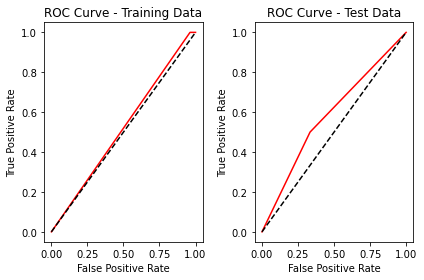

In [11]:
# Part Di - Compute Naive Bayes Classification with the Sample Set as it stands..

y_True = trainingSet['Outcome'];
X_True = np.array(trainingSet.drop('Outcome',axis='columns'));

y_Test = testSet['Outcome'];
X_Test = np.array(testSet.drop('Outcome',axis='columns'));

[yt1,yt2] = NaiveBayes(X_True,y_True,X_Test,y_Test) # Perform the Naive Bayes classification function above!


In [12]:
# Part Dii - Balance the dataset and perform KNN

print('BEFORE : ')
print('Number of minority samples : ', sum(y_True))
print('Number of majority samples : ', y_True.shape[0] - sum(y_True))

# Step 1: Downsample the common class to 90 samples
trainingSet2 = trainingSet.loc[trainingSet['Outcome']==0].loc[0:89]; # reduce the number of majority class samples to 90
trainingSet2 = trainingSet2.append(trainingSet.loc[trainingSet['Outcome']==1]) # add back all the minority samples
X_True2 = np.array(trainingSet2.drop('Outcome',axis='columns'))
y = trainingSet2['Outcome']

#Step 2 : Upsample the minority class using SMOTE
smt = samp.SMOTE(k_neighbors = 5, sampling_strategy=1)
trainingSet2,y_True2 = smt.fit_resample(trainingSet2,y)

print('AFTER : ')
print('Number of minority samples : ', sum(y_True2))
print('Number of majority samples : ', y_True2.shape[0] - sum(y_True2))

BEFORE : 
Number of minority samples :  37
Number of majority samples :  131
AFTER : 
Number of minority samples :  90
Number of majority samples :  90


---TRAINING DATA---

Confusion Matrix : 
 [[ 0 90]
 [ 0 90]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.50      1.00      0.67        90

    accuracy                           0.50       180
   macro avg       0.25      0.50      0.33       180
weighted avg       0.25      0.50      0.33       180
 

---TEST DATA---

Confusion Matrix : 
 [[13  8]
 [ 5  5]] 

Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.38      0.50      0.43        10

    accuracy                           0.58        31
   macro avg       0.55      0.56      0.55        31
weighted avg       0.61      0.58      0.59        31
 

Training AUC : 	 0.5
Test AUC : 	 0.5595238095238095


C:\Users\cwr53\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cwr53\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cwr53\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


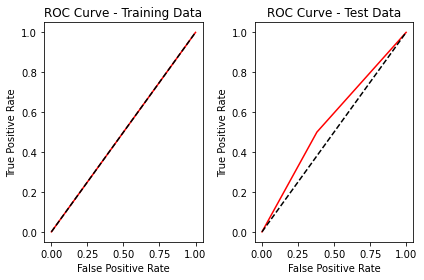

In [13]:
# Create new mean, std for the balanced training set

X_True2 = np.array(trainingSet2.drop('Outcome',axis='columns'))

[yt3, yt4] = NaiveBayes(X_True2,y_True2,X_Test,y_Test);

In [129]:
# Part E - Extra Practice; use KNN Regression to Solve

# Start from scratch; re-read in the data

cols = ['Income','Outcome','ID',
        'Rad.1','Tex.1','Peri.1','Area.1','Smooth.1','Compact.1','Concavity.1','CP.1','Symm.1','FD.1',
        'Rad.2','Tex.2','Peri.2','Area.2','Smooth.2','Compact.2','Concavity.2','CP.2','Symm.2','FD.2',
        'Rad.3','Tex.3','Peri.3','Area.3','Smooth.3','Compact.3','Concavity.3','CP.3','Symm.3','FD.3',
        'TumorSize','LymphNodes']; # write out column names
partE = pd.read_csv(r'../data/wpbc.data',names = cols); # read in the WPBC data frame

# Capture classification array
partE = partE.replace('N',0)
partE = partE.replace('R',1)

# Create feature matrix
partE.drop('Income',axis='columns',inplace=True)
partE.drop('ID',axis='columns',inplace=True) 

# Change the '?' to median of Lymph Node column
partE.replace('?',-1,inplace = True); # replace ?'s with absurd value that cannot be true
med = partE.median(axis=0)
partE.replace(-1,med['LymphNodes'],inplace = True); # replace absurd value with median value
partE['LymphNodes'] = pd.to_numeric(partE['LymphNodes']) # change col from str to numerical

# Create Full Training and Test matrices
trainingSet3 = pd.DataFrame();
trainingSet3 = trainingSet3.append(partE.loc[partE['Outcome']==0].reset_index().loc[0:129,:], ignore_index = True); # Add the 1st 130 non-recurrent cases to training set
trainingSet3 = trainingSet3.append(partE.loc[partE['Outcome']==1].reset_index().loc[0:36,:], ignore_index = True); # Add the 1st 37 recurrent cases to training set
trainingSet3 = trainingSet3.append(partE.loc[196,:], ignore_index = True); # Add row 197
trainingSet3.drop('index',axis='columns',inplace=True)

# Create Test Set
testSet3 = pd.DataFrame();
testSet3 = testSet3.append(partE.loc[partE['Outcome']==0].reset_index().loc[130:196:,:], ignore_index = True); 
testSet3 = testSet3.append(partE.loc[partE['Outcome']==1].reset_index().loc[37:,:], ignore_index = True);
testSet3.drop('index',axis='columns',inplace = True)


# DO SOME FUCKING WORK!!

trainingSet3 = trainingSet3.sort_values(by=['Outcome'],ignore_index=True)
# Convert feature matrix to Numpy
X_train = np.array(trainingSet3.drop('Outcome',axis='columns'))
y_train = np.array(trainingSet3['Outcome'])
Z_train = np.zeros([X_train.shape[0],X_train.shape[1],2])

k = len(trainingSet3)-sum(trainingSet3['Outcome']);
TS = trainingSet3.loc[0:0.2*k,:]
TS = TS.append(trainingSet3.loc[k:k+0.2*(len(trainingSet3)-k),:],ignore_index=True)

TS2 = trainingSet3.loc[0.2*k+1:k,:]
TS2 = TS.append(trainingSet3.loc[k+0.2*(len(trainingSet3)-k):,:],ignore_index=True)

X_train1 = np.array(TS.drop('Outcome',axis='columns'))
y_train1 = np.array(TS['Outcome'])

X_train2 = np.array(TS2.drop('Outcome',axis='columns'))
y_train2 = np.array(TS2['Outcome'])

X_test = np.array(testSet3.drop('Outcome',axis='columns'))
y_test = np.array(testSet3['Outcome'])

# Create KNN Regression model to find k*
i = np.arange(20)
k = i + 1;
errorMSE = np.zeros([i.shape[0],1])
for u in i:
    KNN = neighbors.KNeighborsRegressor(n_neighbors = k[u], weights = 'uniform', metric = 'euclidean')
    KNN.fit(X_train1,y_train1);
    yt5 = KNN.predict(X_test);
    errorMSE[u] = sum((y_test-yt5)**2)/y_test.shape[0];
    
    index_min = np.argmin(errorMSE)

print('K* = ', k[index_min])

# Find MSE for the training set
KNN = neighbors.KNeighborsRegressor(n_neighbors = k[index_min], weights = 'uniform', metric = 'euclidean')
KNN.fit(X_train2,y_train2);

# Find MSE for the training set
yt6 = KNN.predict(X_train2)
errorMSE1 = sum((y_train2-yt6)**2)/y_train2.shape[0];

# Find MSE for the test set
yt7 = KNN.predict(X_test)
errorMSE2 = sum((y_test-yt7)**2)/y_test.shape[0];

print('20% Training Set MSE : \t', float(errorMSE[index_min]))
print('80% Training Set MSE : \t', errorMSE1)
print('Test Set MSE: \t\t', errorMSE2)

K* =  8
20% Training Set MSE : 	 0.22026209677419356
80% Training Set MSE : 	 0.2264423076923077
Test Set MS: 		 0.32006048387096775


In [133]:
# Let's repeat the entire thing using SMOTE

# Upsample the minority class using SMOTE
smt = samp.SMOTE(k_neighbors = 5, sampling_strategy=1)
trainingSet4,y_Train = smt.fit_resample(trainingSet3,trainingSet3['Outcome'])

# DO SOME FUCKING WORK!!

trainingSet4 = trainingSet4.sort_values(by=['Outcome'],ignore_index=True)
# Convert feature matrix to Numpy
X_train = np.array(trainingSet4.drop('Outcome',axis='columns'))
y_train = np.array(trainingSet4['Outcome'])
Z_train = np.zeros([X_train.shape[0],X_train.shape[1],2])

k = len(trainingSet4)-sum(trainingSet4['Outcome']);
TS = trainingSet3.loc[0:0.2*k,:]
TS = TS.append(trainingSet4.loc[k:k+0.2*(len(trainingSet4)-k),:],ignore_index=True)

TS2 = trainingSet3.loc[0.2*k+1:k,:]
TS2 = TS.append(trainingSet4.loc[k+0.2*(len(trainingSet4)-k):,:],ignore_index=True)

X_train1 = np.array(TS.drop('Outcome',axis='columns'))
y_train1 = np.array(TS['Outcome'])

X_train2 = np.array(TS2.drop('Outcome',axis='columns'))
y_train2 = np.array(TS2['Outcome'])

X_test = np.array(testSet3.drop('Outcome',axis='columns'))
y_test = np.array(testSet3['Outcome'])

# Create KNN Regression model to find k*
i = np.arange(20)
k = i + 1;
errorMSE = np.zeros([i.shape[0],1])
for u in i:
    KNN = neighbors.KNeighborsRegressor(n_neighbors = k[u], weights = 'uniform', metric = 'euclidean')
    KNN.fit(X_train1,y_train1);
    yt5 = KNN.predict(X_test);
    errorMSE[u] = sum((y_test-yt5)**2)/y_test.shape[0];
    
    index_min = np.argmin(errorMSE)

print('K* = ', k[index_min])

# Find MSE for the training set
KNN = neighbors.KNeighborsRegressor(n_neighbors = k[index_min], weights = 'uniform', metric = 'euclidean')
KNN.fit(X_train2,y_train2);

# Find MSE for the training set
yt6 = KNN.predict(X_train2)
errorMSE1 = sum((y_train2-yt6)**2)/y_train2.shape[0];

# Find MSE for the test set
yt7 = KNN.predict(X_test)
errorMSE2 = sum((y_test-yt7)**2)/y_test.shape[0];

print('20% Training Set MSE : \t', float(errorMSE[index_min]))
print('80% Training Set MSE : \t', errorMSE1)
print('Test Set MSE: \t\t', errorMSE2)

K* =  12
20% Training Set MSE : 	 0.24081541218637986
80% Training Set MSE : 	 0.1248241912798871
Test Set MS: 		 0.4935035842293907


In [136]:
print('Based on the work above, it does not look like SMOTE helped the Test Set MSE. I cannot tell if that is due')
print('to an error on my part or if this is a legitimate answer...')

Based on the work above, it does not look like SMOTE helped the Test Set MSE. I cannot tell if that is due
to an error on my part or if this is a legitimate answer...


In [ ]:
# References

# ROC, AUC: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
# Classification Report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
# Exponentials of Arrays: https://appdividend.com/2020/04/29/python-numpy-exp-function-example/
